# Gemini Pro with LangChain on Google AI Studio

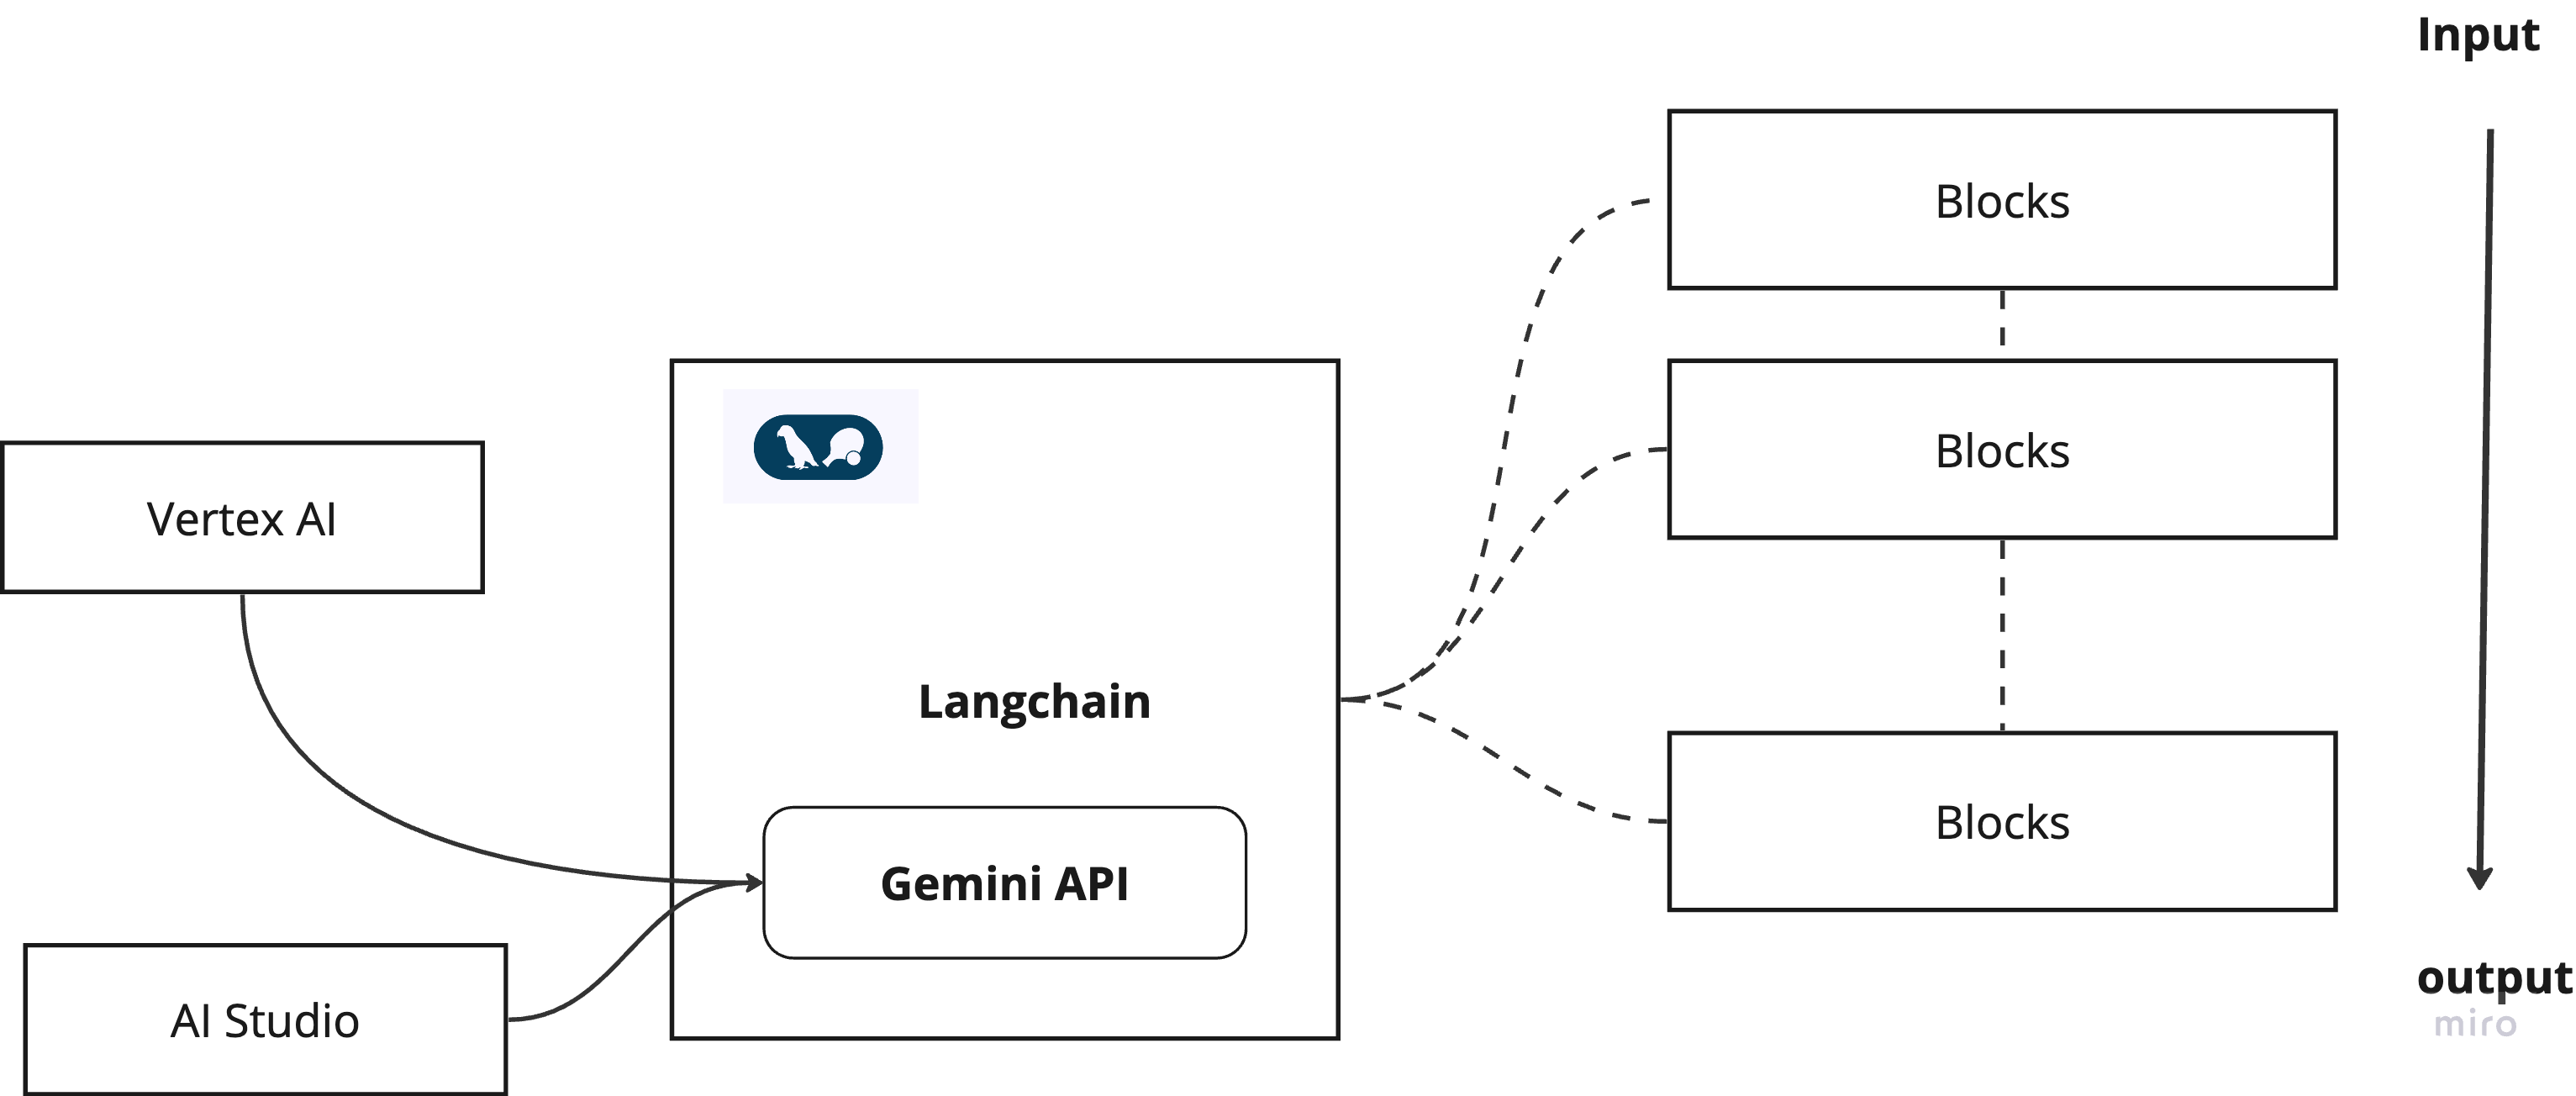

## Install packages

In [ ]:
%pip install --upgrade  langchain langchain-google-genai "langchain[docarray]" faiss-cpu

In [4]:
import os
import getpass
import requests
from PIL import Image
#from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.messages import HumanMessage, SystemMessage
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.vectorstores import DocArrayInMemorySearch
from langchain_google_genai import GoogleGenerativeAIEmbeddings
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate

from langchain_text_splitters import CharacterTextSplitter
from langchain.schema.document import Document
from langchain_community.document_loaders import TextLoader

from langchain_core.runnables import RunnableLambda, RunnablePassthrough

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import display, Markdown

In [5]:
from langchain_community.vectorstores import FAISS

## Set API Key

In [6]:
import google.generativeai as genai
genai.configure(api_key='xxxxxxxxxxxxxxxx')


In [ ]:
if "GOOGLE_API_KEY" not in os.environ:
    os.environ["GOOGLE_API_KEY"] = getpass.getpass("Provide your Google API Key")

Provide your Google API Key··········


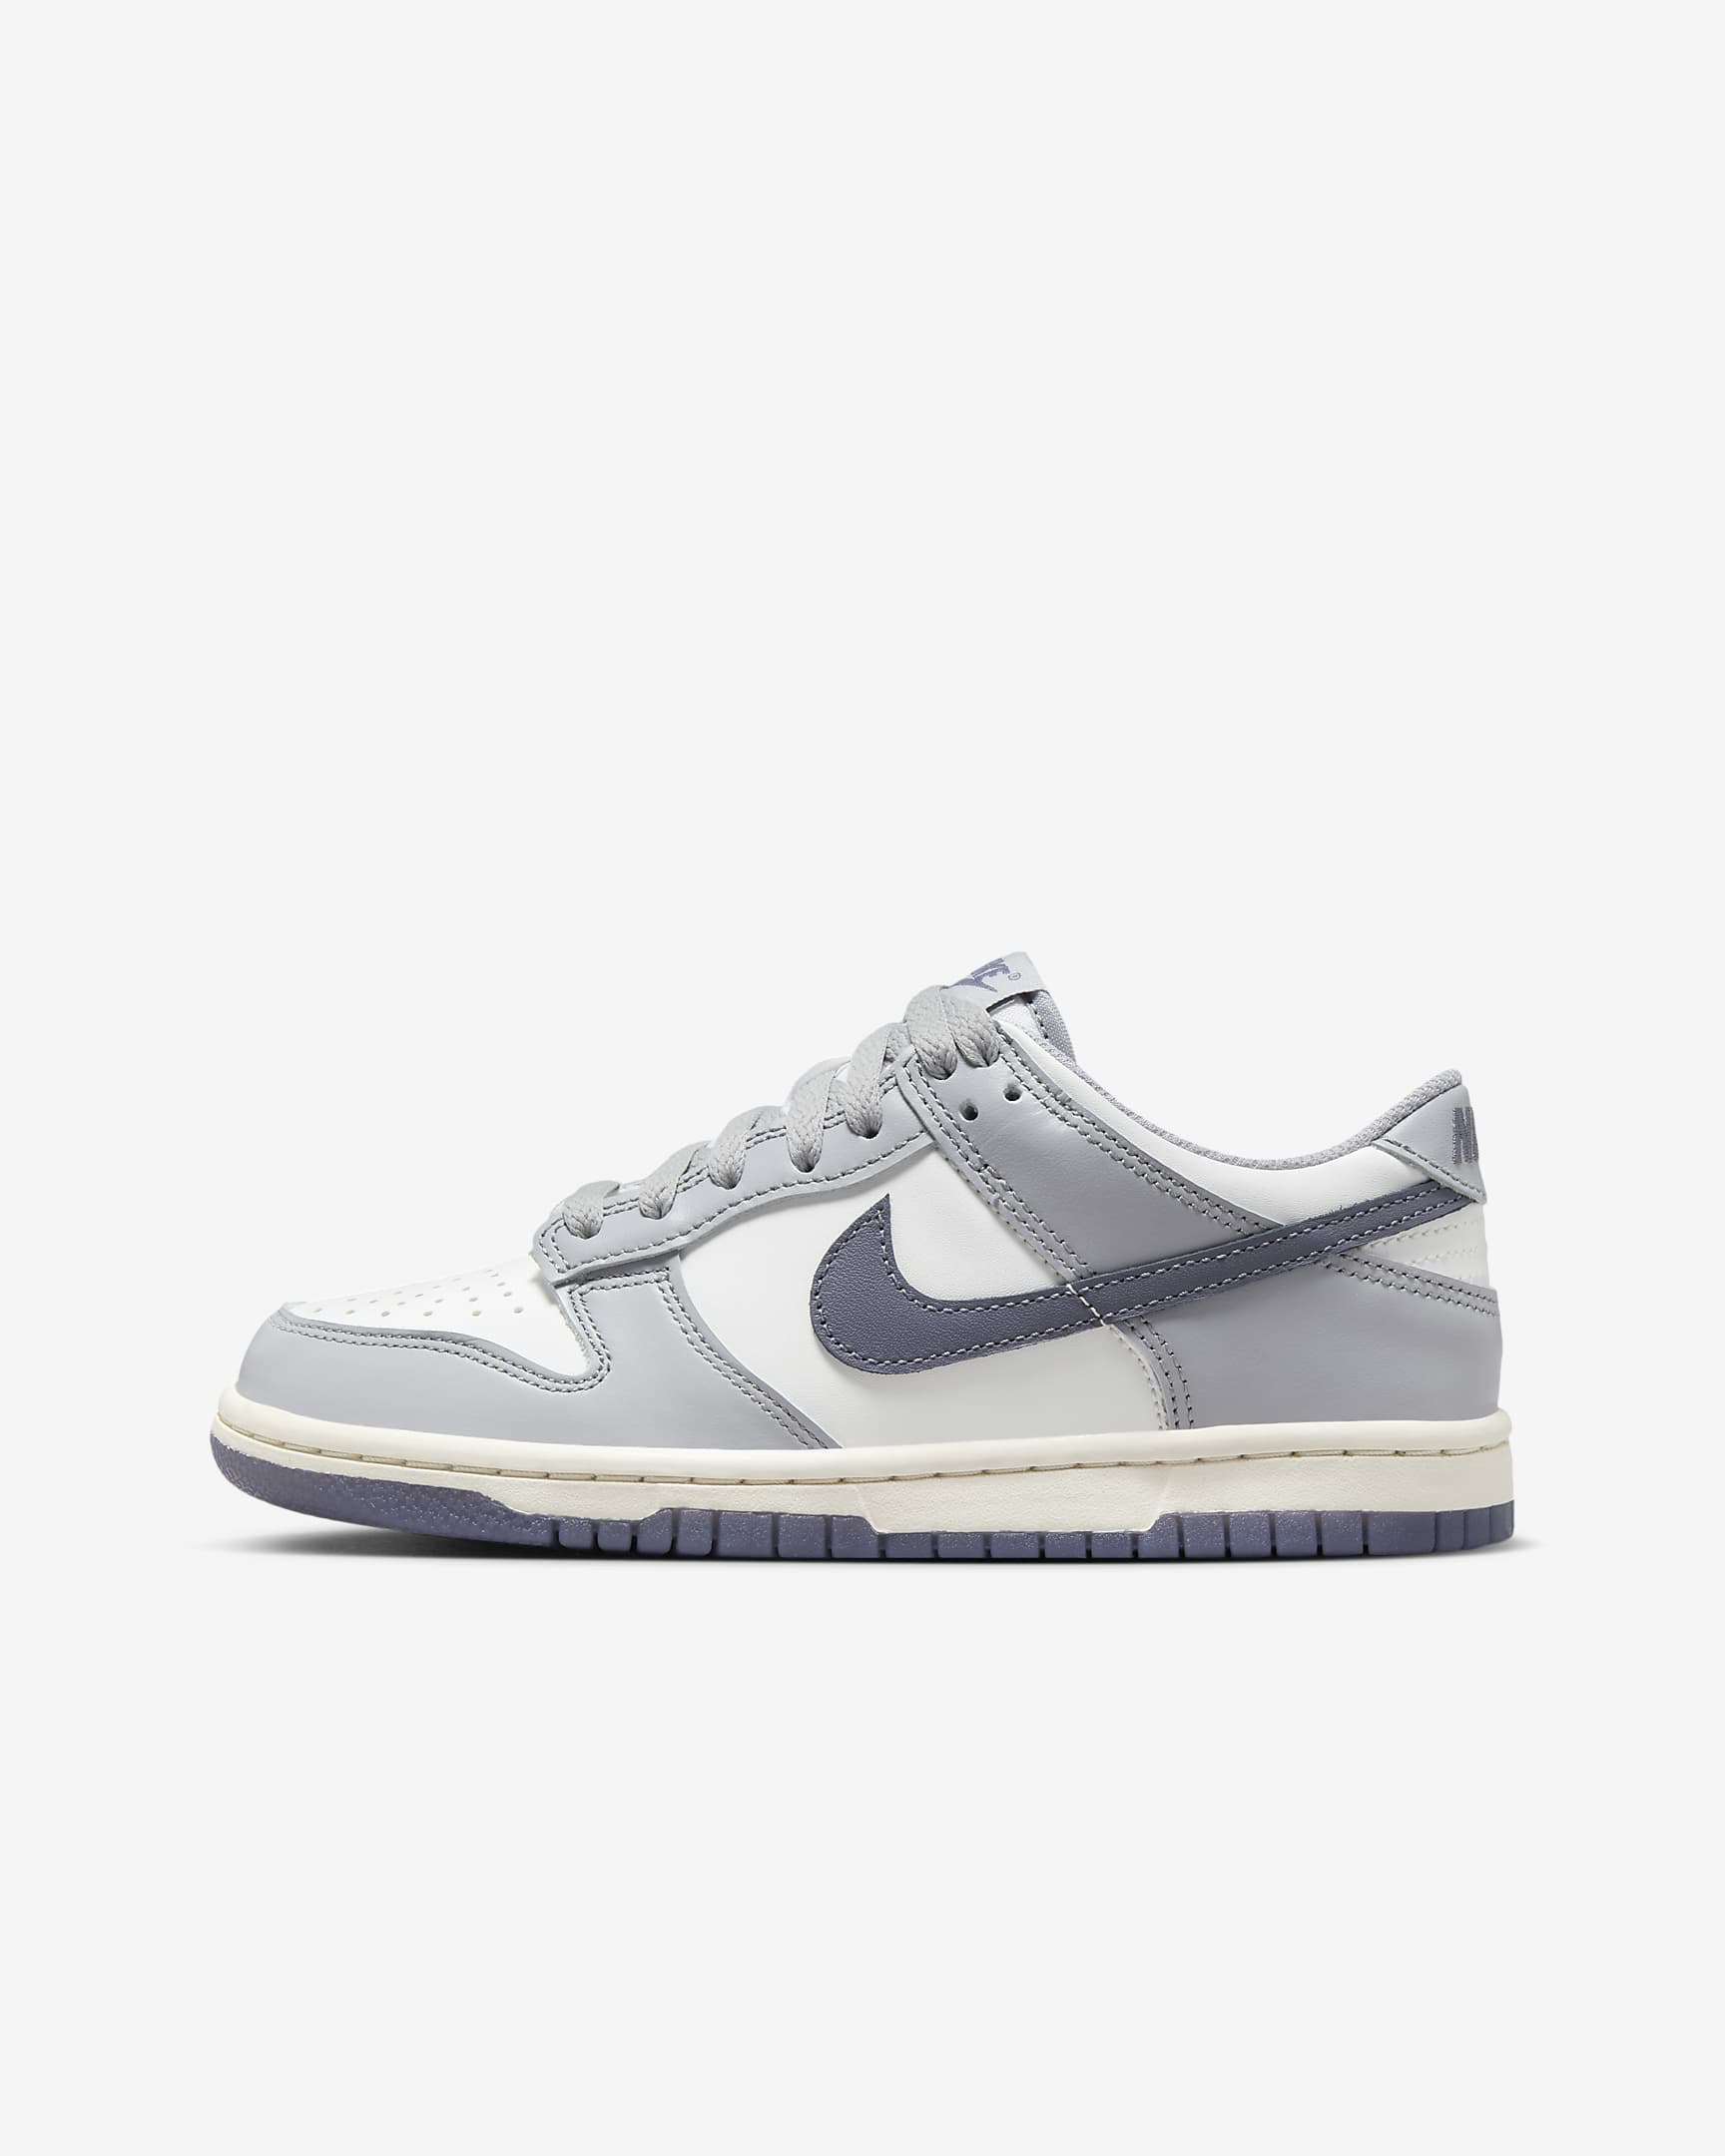

In [10]:
import requests
import io
from PIL import Image

def show_image2(url):
    response = requests.get(url)
    image = Image.open(io.BytesIO(response.content))
    return image
  #display(image)

show_image("https://static.nike.com/a/images/t_PDP_1728_v1/f_auto,q_auto:eco/1705ca64-fbc8-4b79-a451-4ab77760c219/dunk-low-older-shoes-C7T1cx.png")

## Custom Functions to load image

In [11]:
# def get_image(url, filename, extention):
#   content = requests.get(url).content
#   with open(f'/content/{filename}.{extention}', 'wb') as f:
#     f.write(content)
#   image = Image.open(f"/content/{filename}.{extention}")
#   image.show()
#   return image

def get_text_chunks_langchain(text):
  text_splitter = CharacterTextSplitter(chunk_size=20, chunk_overlap=10)
  docs = [Document(page_content=x) for x in text_splitter.split_text(text)]
  return docs

## Simple LLM chain

In [8]:
llm = ChatGoogleGenerativeAI(model="gemini-pro")
result = llm.invoke("說明這模型的優點")
print(result.content)

**優點：**

* **準確度高：**該模型經過廣泛的訓練資料訓練，展現出高準確度，可以準確預測結果。
* **泛化能力強：**該模型能夠處理未見過的資料，並做出可靠的預測，展現出強大的泛化能力。
* **訓練時間短：**該模型採用高效的演算法訓練，訓練時間相對較短，可以快速部署到實際應用中。
* **可解釋性：**該模型的可解釋性良好，可以使用技術（例如 LIME 或 SHAP）來了解模型的決策過程。
* **可擴充性：**該模型可以透過新增資料或調整演算法來輕鬆擴充，以適應不同的問題或資料集。
* **自動化：**該模型可以自動執行預測任務，節省時間和資源，並提高效率。
* **可視化：**該模型的結果可以透過圖表或儀表板進行視覺化，方便使用者理解和分析。
* **成本效益：**該模型的訓練和部署成本相對較低，使其成為企業和組織的可行解決方案。
* **可調整性：**該模型可以根據特定應用程式的需求進行調整，以優化準確度或效能。
* **開放原始碼：**許多機器學習模型都是開放原始碼的，允許使用者自訂和修改模型以滿足他們的特定需求。


## Simple LLM chain with Chat

In [9]:
model = ChatGoogleGenerativeAI(model="gemini-pro")
print(
    model(
    [
        HumanMessage(content="Answer with Simple 'Yes' or 'No'. Question: Is apple a Fruit?"),
    ]
).content
)

C:\Users\USER\anaconda3\envs\myenv\lib\site-packages\langchain_core\_api\deprecation.py:139: LangChainDeprecationWarning: The method `BaseChatModel.__call__` was deprecated in langchain-core 0.1.7 and will be removed in 0.3.0. Use invoke instead.
  warn_deprecated(


Yes


## Multimodal llm chain

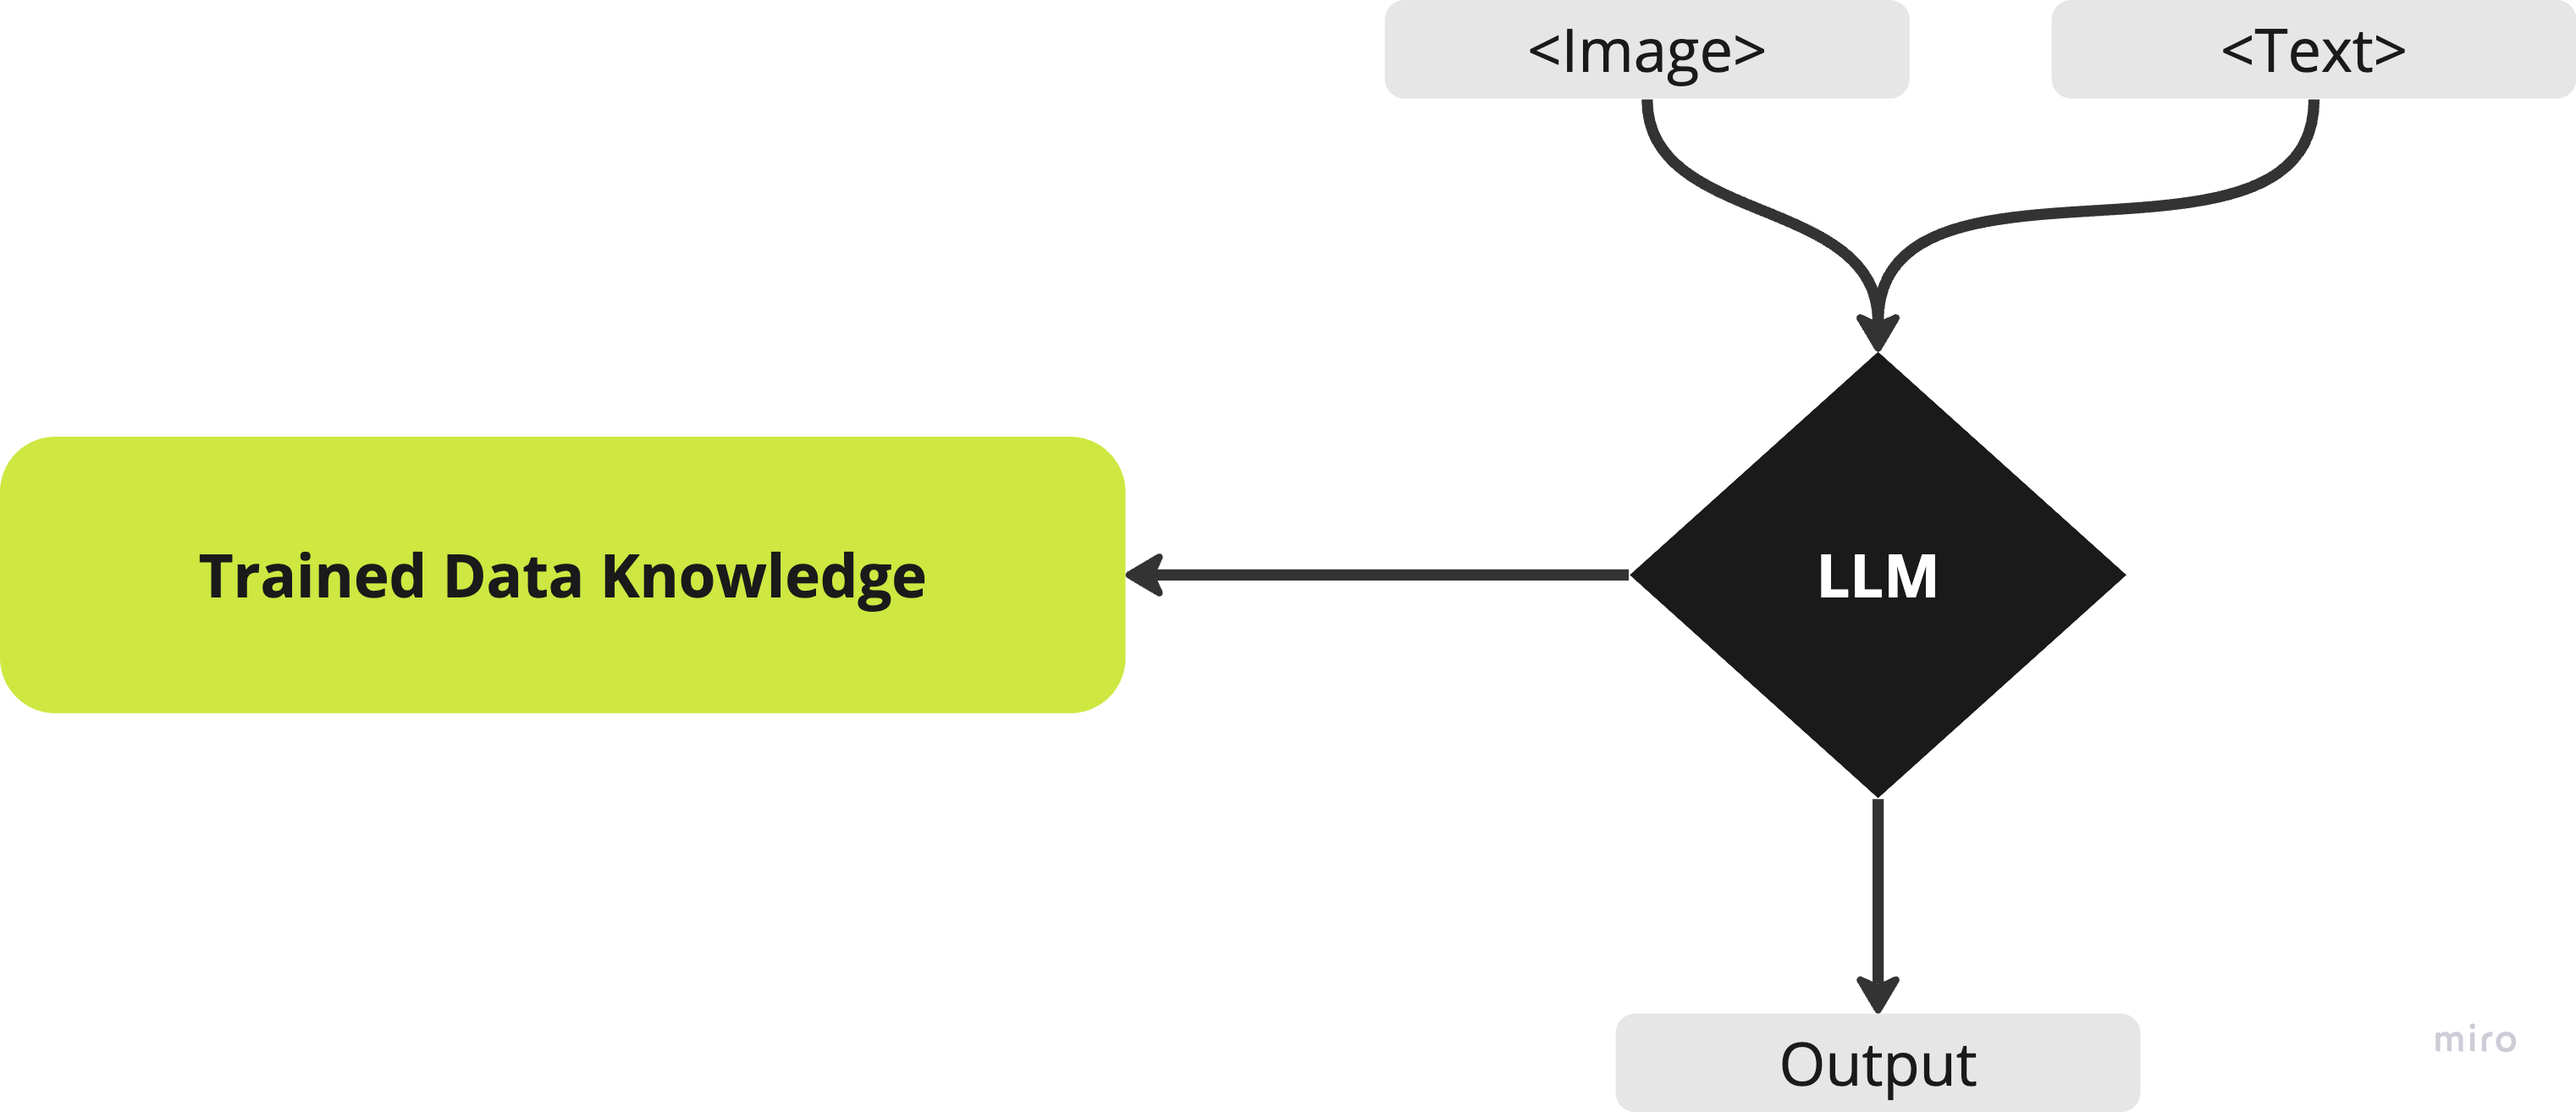

In [26]:
# image = get_image("https://static.nike.com/a/images/t_PDP_1728_v1/f_auto,q_auto:eco/1705ca64-fbc8-4b79-a451-4ab77760c219/dunk-low-older-shoes-C7T1cx.png",
#                   "nike-01",
#                   "png")
# plt.imshow(image)
# plt.show()

#image=show_image("https://static.nike.com/a/images/t_PDP_1728_v1/f_auto,q_auto:eco/1705ca64-fbc8-4b79-a451-4ab77760c219/dunk-low-older-shoes-C7T1cx.png")
image_url = "https://static.nike.com/a/images/t_PDP_1728_v1/f_auto,q_auto:eco/1705ca64-fbc8-4b79-a451-4ab77760c219/dunk-low-older-shoes-C7T1cx.png"
prompt_ocr = """
Extract all the details from the image.
"""

llm = ChatGoogleGenerativeAI(model="gemini-pro-vision")
message = HumanMessage(
    content=[
        {
            "type": "text",
            "text": prompt_ocr,
        },  # You can optionally provide text parts
        {"type": "image_url", "image_url": image},
    ]
)

# Send the message to the LLM model and get the response
print(
    llm.invoke([message]).content
)

 **Nike Offcourt Slide**
* Synthetic upper
* Slip-on construction
* Foam midsole
* Rubber outsole
* Imported


## Mini RAG

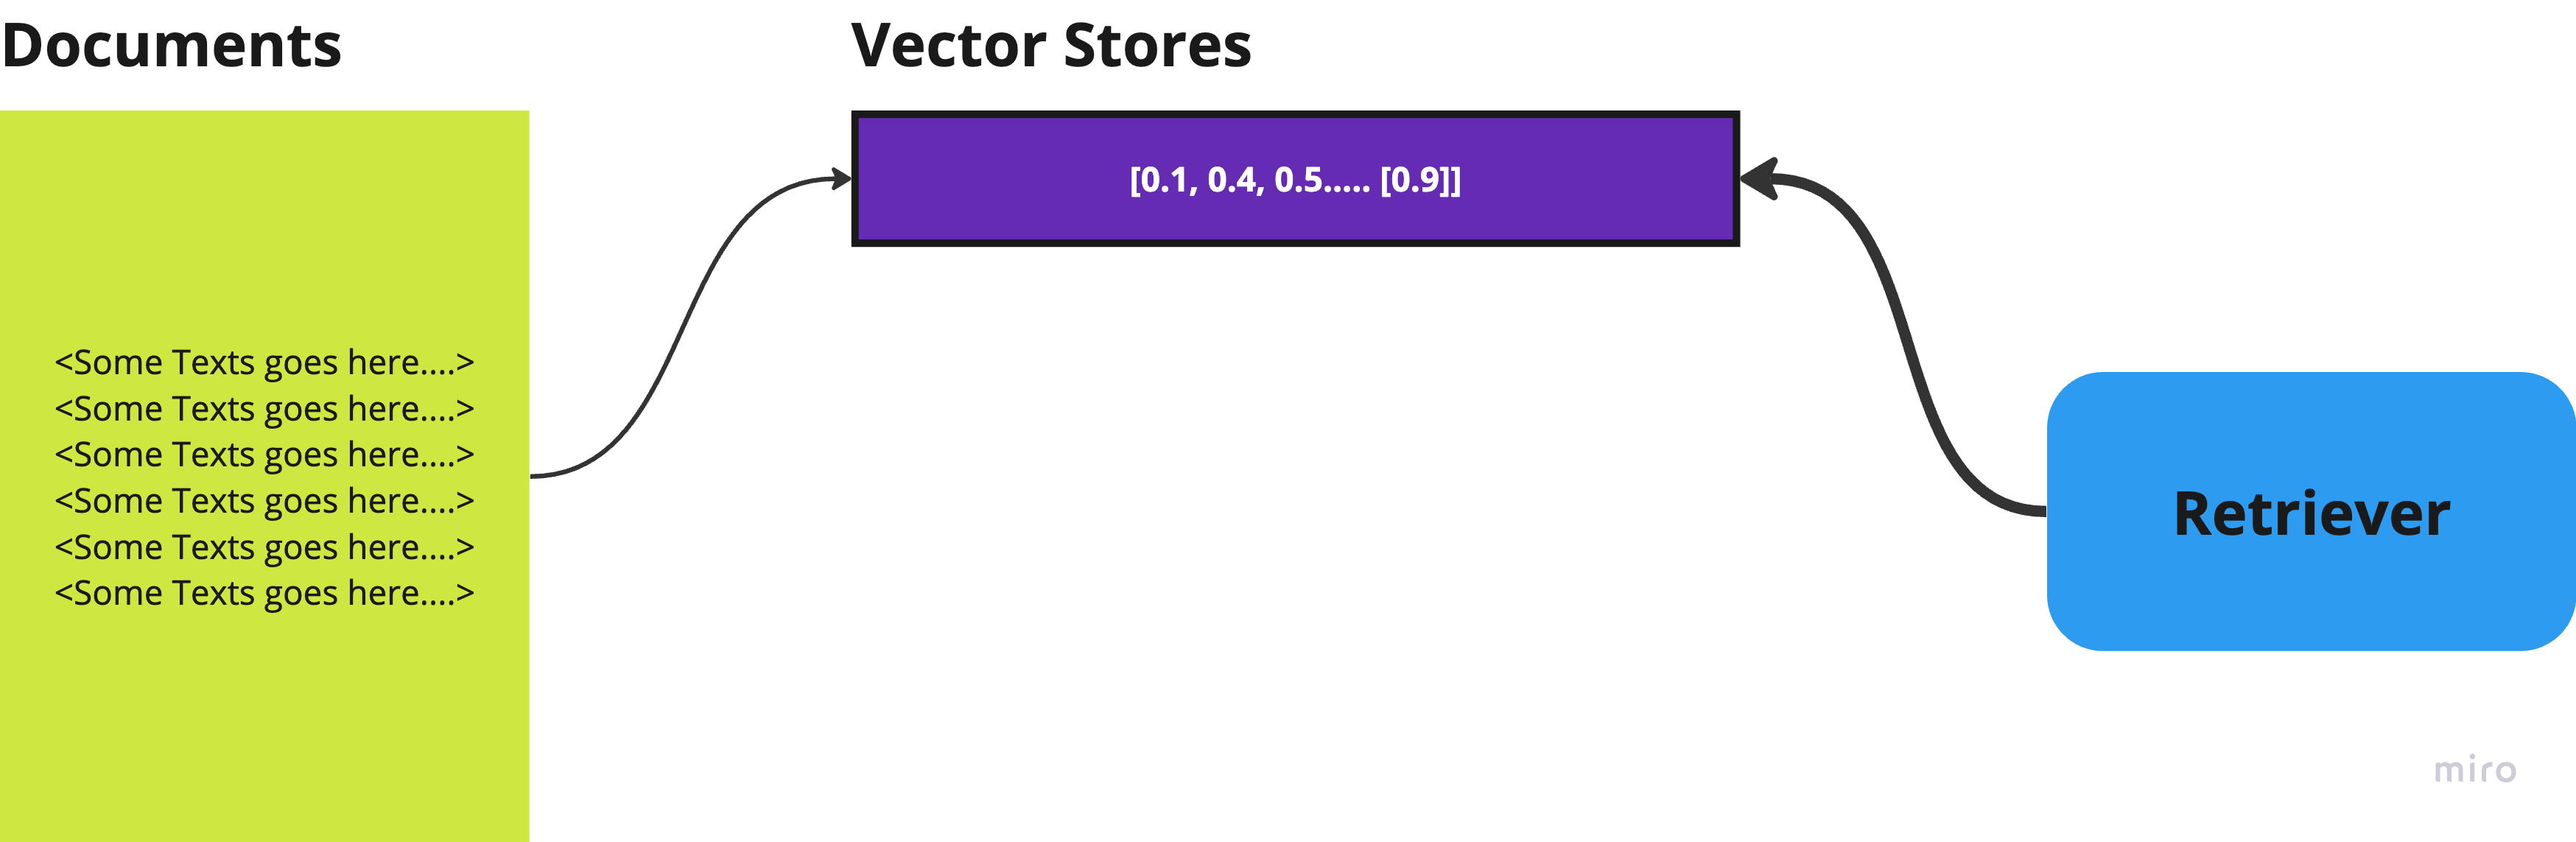

#### Setting up Knowledge base

In [15]:
store_information = """

Nike Air Max Plus sneakers. They feature a brown upper with a black Nike Swoosh logo on the side and a visible Air Max unit in the heel. The sole is white.
Here are some more details about the Nike Air Max Plus:
Style: TN
Release date: January 1, 2017
Style code: 852630-300
Original retail price: $150 USD
The Air Max Plus, also known as the TN, is a popular Nike running shoe that was first released in 1998. It is known for its unique design, which includes a gradient upper, visible Air Max units, and a wavy outsole. The TN has been a popular shoe among sneakerheads and casual wearers alike for over two decades.
It features a brown upper with a black Swoosh logo and a white sole. The shoe is currently available for resale on the StockX marketplace for an average price of around $150 USD.
Nike Air Max Plus Store Location: "Kings Way, Kathmandu, Nepal".
\n\n\n



Nike Dunk Low Retro sneakers.
Here are some more details about the Nike Dunk Low Retro:
Style: Low-top
Release date: October 31, 2020
Style code: DD1391-100
Original retail price: $100 USD
The Dunk Low Retro is a popular Nike skateboarding shoe that was first released in 1985. It is a classic silhouette that has been released in a wide variety of colors and materials over the years.
The shoes in the image are currently available for resale on the StockX marketplace for an average price of around $200 USD.
Nike Dunk Low Retro sneakers Store Location: "Patan, Lalitpur, Nepal".
\n\n\n




Nike slide/sandal.
They appear to be the Nike Slide/Sandal, which is a unisex slide/sandal.
Here are some of the features:
Soft, one-piece upper: The upper is made of a soft, synthetic material that provides comfort and support.
Phylon midsole: The midsole is made of Phylon, which provides cushioning and support.
Rubber outsole: The outsole is made of rubber for traction and durability.
Swoosh logo: The Nike Swoosh logo is on the strap of the sandal.
Available in a variety of colors: The Nike Benassi Solarsoft Sandal is available in a variety of colors, including black, white, and beige.
Nike off courte slides store location: "Bhaktapur, Nepal".

"""

docs = get_text_chunks_langchain(store_information)

Created a chunk of size 862, which is longer than the specified 20
Created a chunk of size 581, which is longer than the specified 20


In [16]:
embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")

vectorstore = FAISS.from_documents(docs,
                                   embedding=embeddings)
retriever = vectorstore.as_retriever()

In [17]:
retriever.invoke("slides")

[Document(page_content='Nike slide/sandal.\nThey appear to be the Nike Slide/Sandal, which is a unisex slide/sandal.\nHere are some of the features:\nSoft, one-piece upper: The upper is made of a soft, synthetic material that provides comfort and support.\nPhylon midsole: The midsole is made of Phylon, which provides cushioning and support.\nRubber outsole: The outsole is made of rubber for traction and durability.\nSwoosh logo: The Nike Swoosh logo is on the strap of the sandal.\nAvailable in a variety of colors: The Nike Benassi Solarsoft Sandal is available in a variety of colors, including black, white, and beige.\nNike off courte slides store location: "Bhaktapur, Nepal".'),
 Document(page_content='Nike Dunk Low Retro sneakers.\nHere are some more details about the Nike Dunk Low Retro:\nStyle: Low-top\nRelease date: October 31, 2020\nStyle code: DD1391-100\nOriginal retail price: $100 USD\nThe Dunk Low Retro is a popular Nike skateboarding shoe that was first released in 1985. It 

#### Text RAG

In [18]:
llm_text = ChatGoogleGenerativeAI(model="gemini-pro")
template = """
```
{context}
```

{information}


Provide brief information and store location.
"""
prompt = ChatPromptTemplate.from_template(template)

rag_chain = (
    {"context": retriever, "information": RunnablePassthrough()}
    | prompt
    | llm_text
    | StrOutputParser()
)

#### RAG with Text and Image

In [19]:
llm_vision = ChatGoogleGenerativeAI(model="gemini-pro-vision", temperature=0.0)
full_chain = (
    RunnablePassthrough() | llm_vision | StrOutputParser() | rag_chain
)

In [20]:
url_1 = "https://static.nike.com/a/images/t_PDP_1728_v1/f_auto,q_auto:eco/b434966d-c850-4aa7-be6c-e99c0e236362/air-max-plus-mens-shoes-3mH52P.png"

url_2 = "https://static.nike.com/a/images/t_PDP_1728_v1/f_auto,q_auto:eco/0f557b1f-ba79-419c-a814-f7b5d117fbb2/dunk-low-retro-shoes-bCzchX.png"

url_3 = "https://static.nike.com/a/images/t_PDP_1728_v1/f_auto,q_auto:eco/252f2db6-d426-4931-80a0-8b7f8f875536/calm-slides-K7mr3W.png"

### Simple RAG

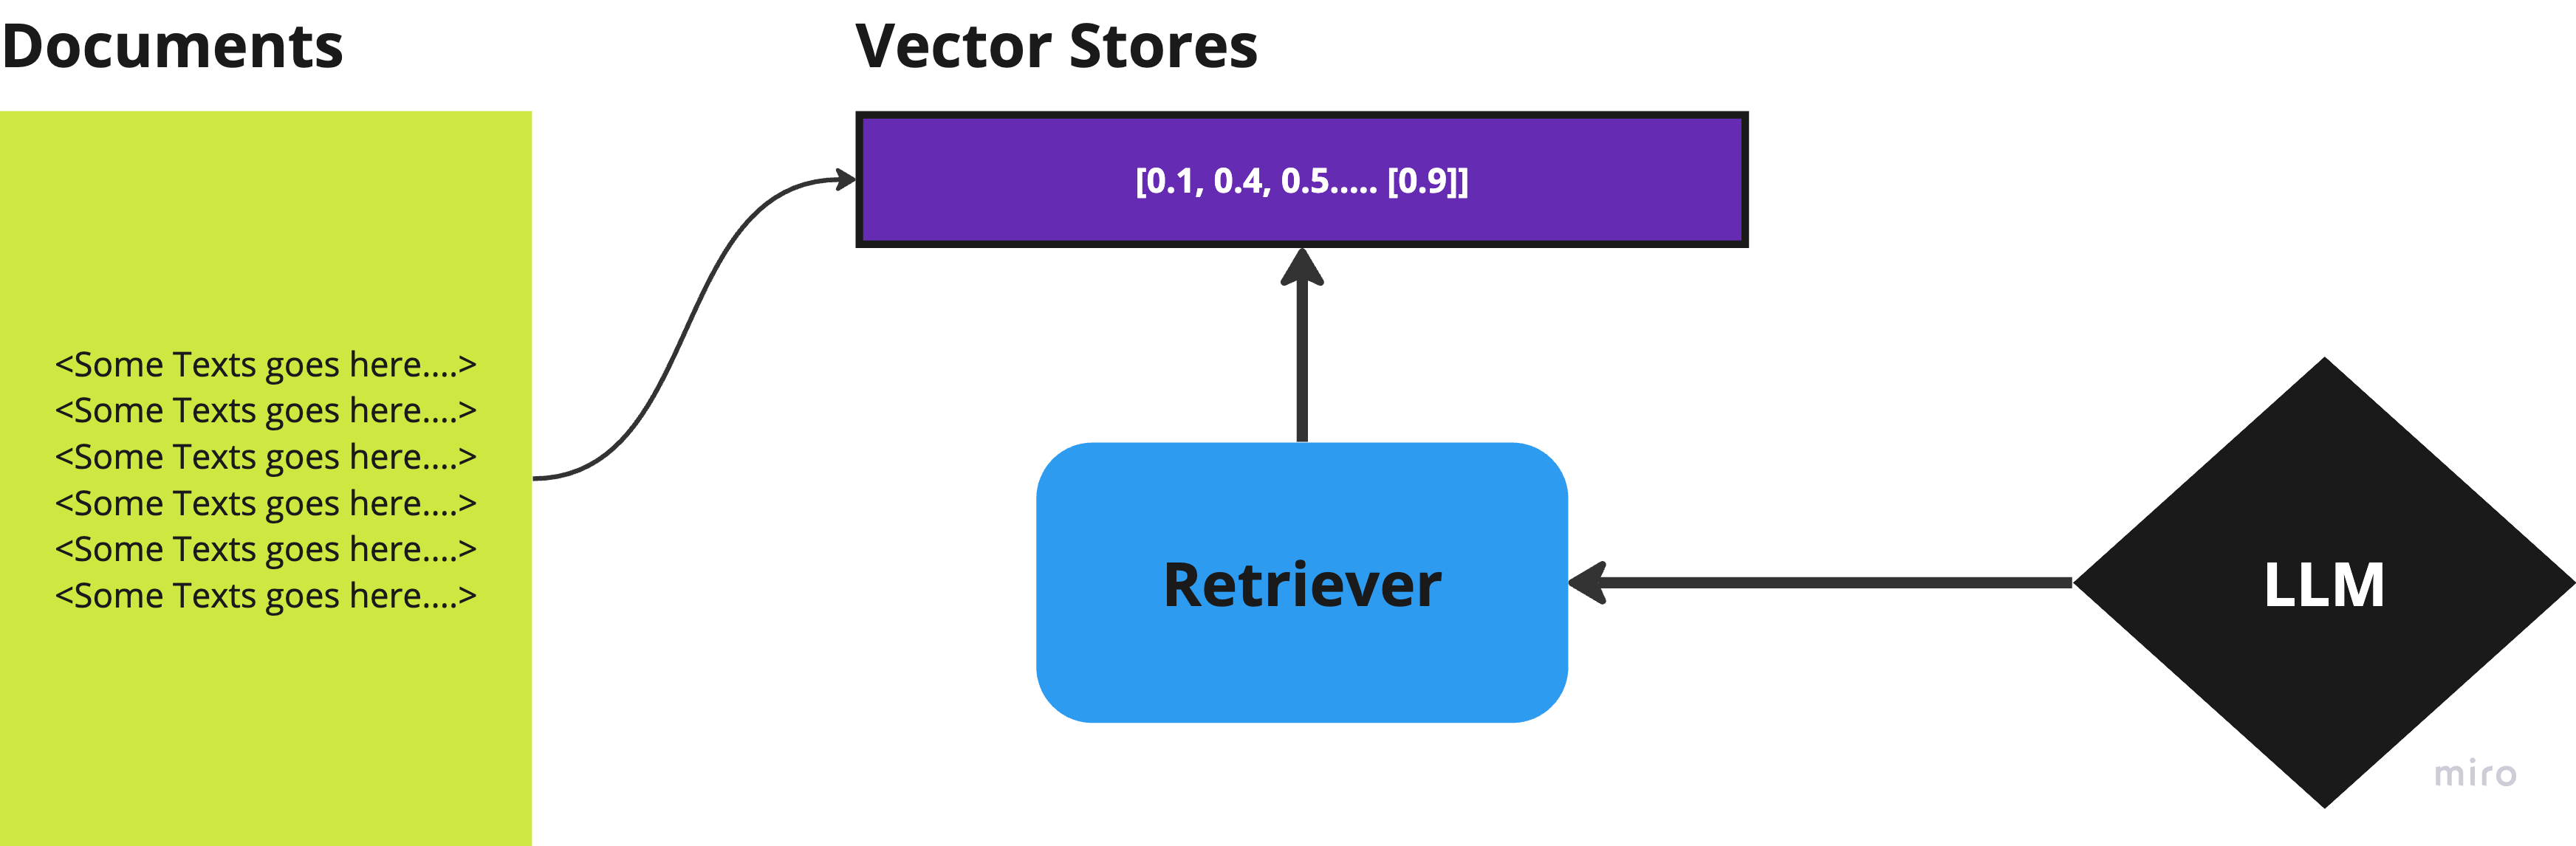

In [21]:
result = rag_chain.invoke("Where can I buy Nike slides?")
display(Markdown(result))

**Nike slides** are available at **Bhaktapur, Nepal**.

### Image RAG

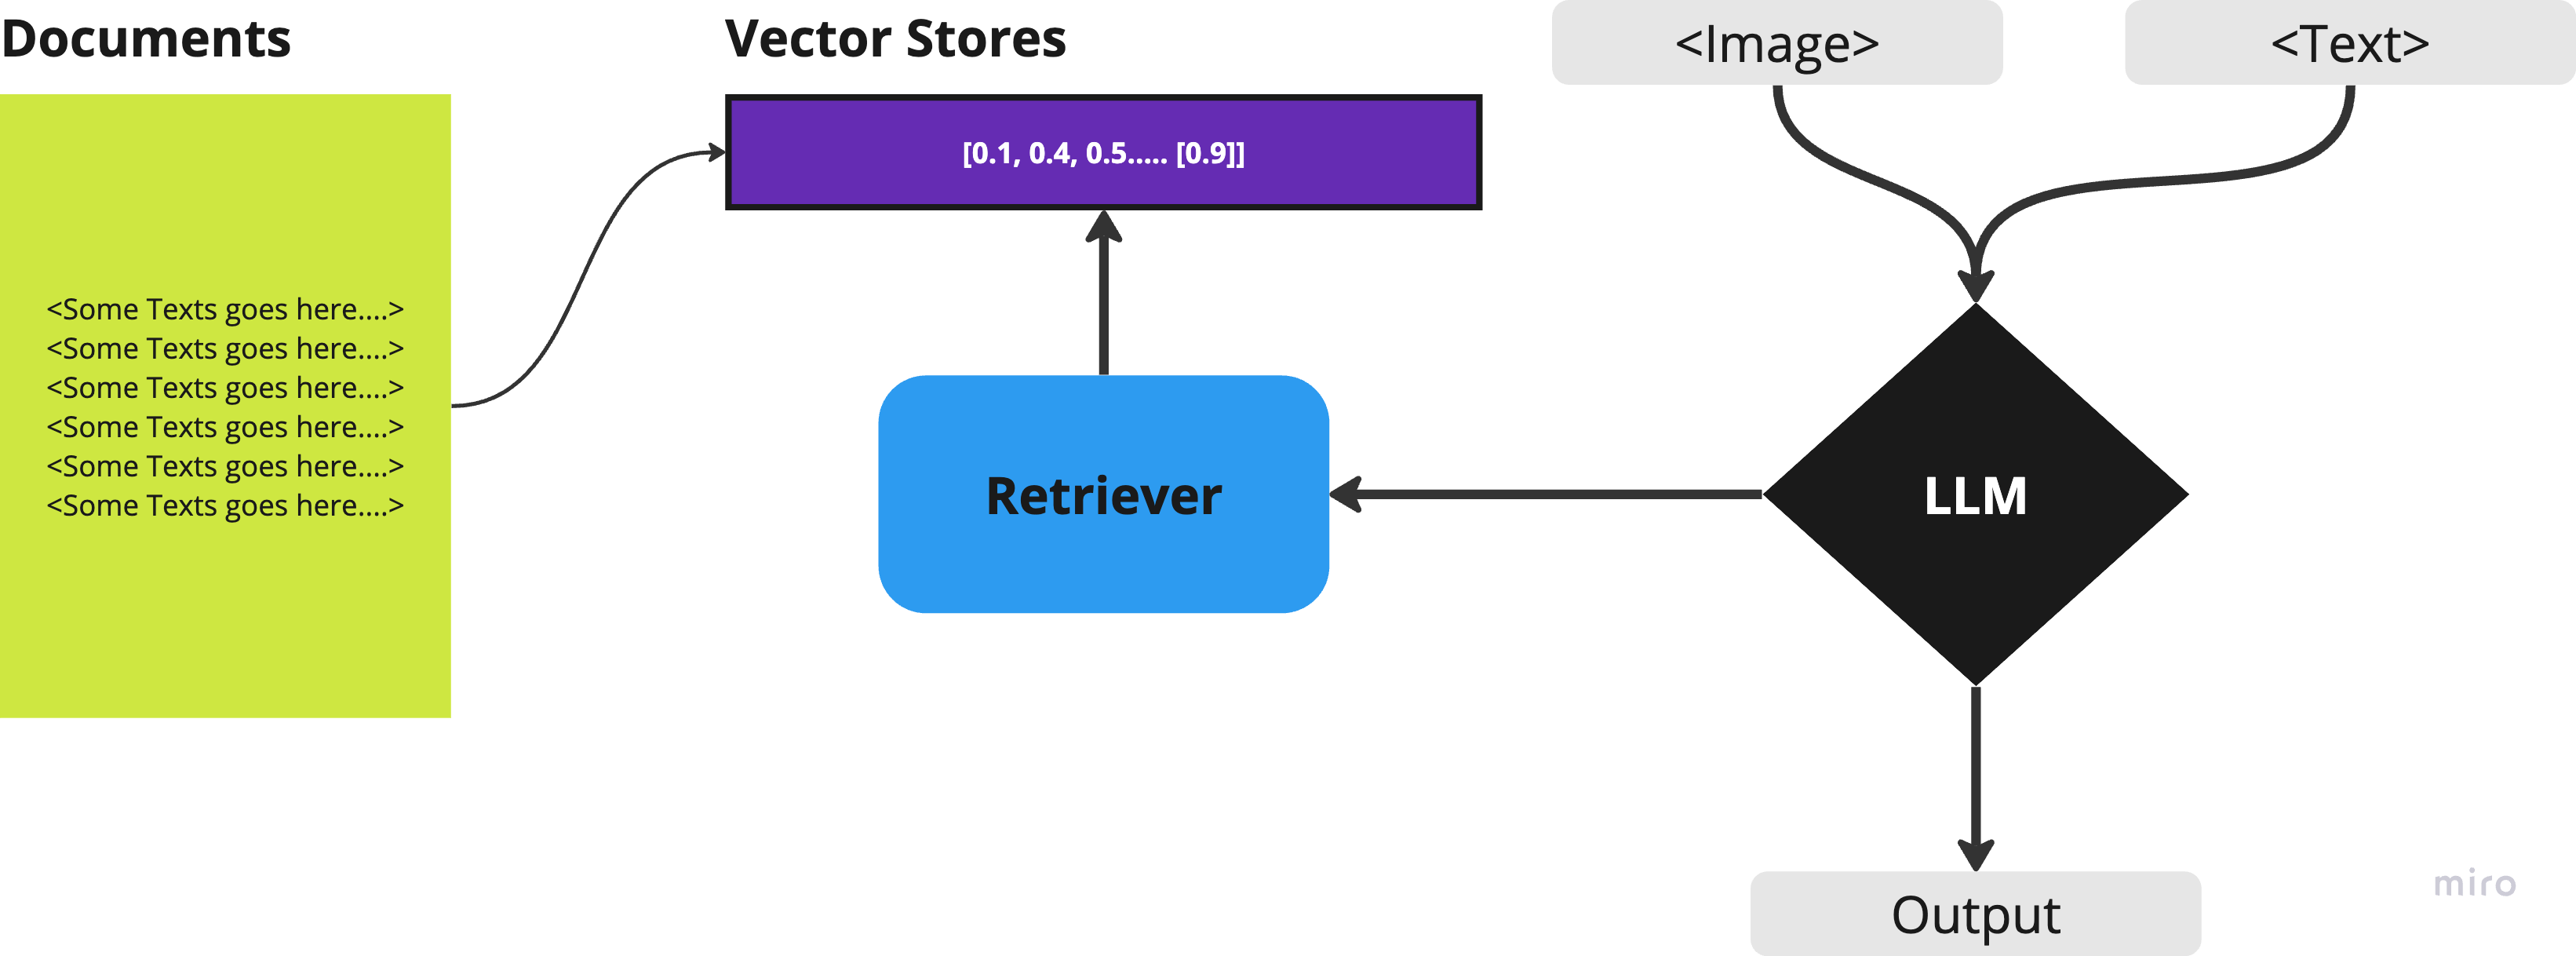

In [23]:
# image = get_image(url_1, "nike1", "png")
# plt.imshow(image)
# plt.show()
image = url_1
message = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "Provide information on given image Brand and model of given sneaker.",
        },  # You can optionally provide text parts
        {"type": "image_url", "image_url": image},
    ]
)


result = full_chain.invoke([message])
display(Markdown(result))

**Nike Air Max Plus**

- Style: TN
- Release date: January 1, 2017
- Style code: 852630-300
- Original retail price: $150 USD
- Store Location: "Kings Way, Kathmandu, Nepal"

In [24]:


image = url_3
message = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "Extract all the details from the image",
        },  # You can optionally provide text parts
        {"type": "image_url", "image_url": image},
    ]
)


result = full_chain.invoke([message])
display(Markdown(result))

**Nike Offcourt Slide**

* Style: DC9348-200
* Color: Sesame/Sesame/White
* Gender: Men's
* Closure: Slip-on
* Upper: Synthetic
* Outsole: Rubber
* Imported
* Store Location: "Bhaktapur, Nepal"